EXPERIMENTO 1

PREPARACION

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [47]:
transform = transforms.Compose([transforms.ToTensor()])

batch_size = 4

trainset = torchvision.datasets.MNIST(
    root="./data", train=True, download=True, transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle=True, num_workers=2
)

testset = torchvision.datasets.MNIST(
    root="./data", train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=batch_size, shuffle=False, num_workers=2
)

classes = ("0", "1", "2", "3", "4", "5", "6", "7", "8", "9")

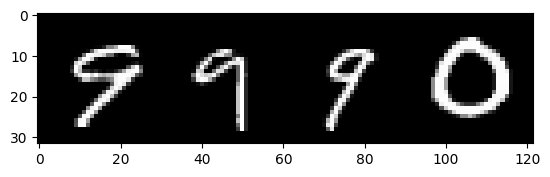

9     9     9     0    


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(" ".join(f"{classes[labels[j]]:5s}" for j in range(batch_size)))

MODELO

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [50]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [51]:
for epoch in range(2):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print(f"[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}")
            running_loss = 0.0

print("Finished Training")

[1,  2000] loss: 1.526
[1,  4000] loss: 0.303
[1,  6000] loss: 0.172
[1,  8000] loss: 0.139
[1, 10000] loss: 0.116
[1, 12000] loss: 0.103
[1, 14000] loss: 0.088
[2,  2000] loss: 0.077
[2,  4000] loss: 0.083
[2,  6000] loss: 0.067
[2,  8000] loss: 0.069
[2, 10000] loss: 0.057
[2, 12000] loss: 0.054
[2, 14000] loss: 0.071
Finished Training


In [52]:
PATH = "./mnist_net.pth"
torch.save(net.state_dict(), PATH)

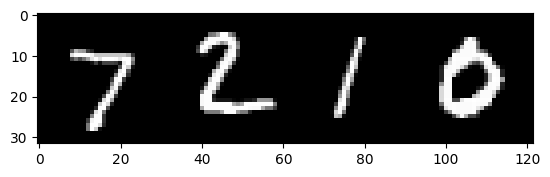

GroundTruth:  7     2     1     0    


In [53]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print("GroundTruth: ", " ".join(f"{classes[labels[j]]:5s}" for j in range(4)))

In [54]:
net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

In [55]:
outputs = net(images)

In [56]:
_, predicted = torch.max(outputs, 1)

print("Predicted: ", " ".join(f"{classes[predicted[j]]:5s}" for j in range(4)))

Predicted:  7     2     1     0    


In [57]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy of the network on the 10000 test images: {100 * correct // total} %")

Accuracy of the network on the 10000 test images: 98 %


In [58]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f"Accuracy for class: {classname:5s} is {accuracy:.1f} %")

Accuracy for class: 0     is 99.2 %
Accuracy for class: 1     is 99.2 %
Accuracy for class: 2     is 98.9 %
Accuracy for class: 3     is 98.7 %
Accuracy for class: 4     is 99.9 %
Accuracy for class: 5     is 98.9 %
Accuracy for class: 6     is 97.6 %
Accuracy for class: 7     is 98.2 %
Accuracy for class: 8     is 96.5 %
Accuracy for class: 9     is 95.2 %


EXPERIMENTO 2

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])

# Se cambia el tamaño del batch a 8
batch_size = 8

trainset = torchvision.datasets.MNIST(
    root="./data", train=True, download=True, transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle=True, num_workers=2
)

testset = torchvision.datasets.MNIST(
    root="./data", train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=batch_size, shuffle=False, num_workers=2
)

classes = ("0", "1", "2", "3", "4", "5", "6", "7", "8", "9")

MODELO

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # Se usa padding="same" para que la salida tenga el mismo tamaño que la entrada
        # de tal forma que la salida mantenga un tamaño suficiente para las capas posteriores
        self.conv1 = nn.Conv2d(1, 6, 3, padding="same")
        self.pool1 = nn.MaxPool2d(2, 2)
        # Se cambia el tamaño del kernel de las capas convolucionales
        self.conv2 = nn.Conv2d(6, 10, 3, padding="same")
        # Se modifica el tamaño del kernel del maxpooling para reducir aun más el tamaño de la salida
        self.pool2 = nn.MaxPool2d(3, 3)
        # Se añade una tercera capa convolucional para aumentar el número de parámetros
        self.conv3 = nn.Conv2d(10, 16, 3, padding="same")
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 42)
        # Se añade una cuarta capa completamente conectada
        self.fc4 = nn.Linear(42, 10)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
# Se modifica el learning rate a uno mayor para acelerar el entrenamiento
optimizer = optim.SGD(net.parameters(), lr=0.005, momentum=0.9)

In [ ]:
# Tan solo se entrena por un epoch
for epoch in range(1):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print(f"[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}")
            running_loss = 0.0

print("Finished Training")

[1,  2000] loss: 0.352
[1,  4000] loss: 0.238
[1,  6000] loss: 0.217
[1,  8000] loss: 0.197
[1, 10000] loss: 0.187
[1, 12000] loss: 0.184
[1, 14000] loss: 0.154
Finished Training


In [111]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy of the network on the 10000 test images: {100 * correct // total} %")

Accuracy of the network on the 10000 test images: 96 %


In [112]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f"Accuracy for class: {classname:5s} is {accuracy:.1f} %")

Accuracy for class: 0     is 98.2 %
Accuracy for class: 1     is 98.8 %
Accuracy for class: 2     is 96.4 %
Accuracy for class: 3     is 97.8 %
Accuracy for class: 4     is 93.6 %
Accuracy for class: 5     is 93.9 %
Accuracy for class: 6     is 94.9 %
Accuracy for class: 7     is 96.6 %
Accuracy for class: 8     is 98.4 %
Accuracy for class: 9     is 94.7 %


EXPERIMENTO 3

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])

# Se cambia el tamaño del batch a 2
batch_size = 2

trainset = torchvision.datasets.MNIST(
    root="./data", train=True, download=True, transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=batch_size, shuffle=True, num_workers=2
)

testset = torchvision.datasets.MNIST(
    root="./data", train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=batch_size, shuffle=False, num_workers=2
)

classes = ("0", "1", "2", "3", "4", "5", "6", "7", "8", "9")

MODELO

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 10, 3)
        self.pool2 = nn.MaxPool2d(3, 3)
        self.conv3 = nn.Conv2d(10, 16, 3)
        self.fc1 = nn.Linear(16 * 1 * 1, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 42)
        self.fc4 = nn.Linear(42, 10)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


net = Net()

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.005, momentum=0.9)

In [120]:
# Tan solo se entrena por un epoch
for epoch in range(1):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print(f"[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}")
            running_loss = 0.0

print("Finished Training")

[1,  2000] loss: 2.306
[1,  4000] loss: 2.306
[1,  6000] loss: 2.305
[1,  8000] loss: 2.305
[1, 10000] loss: 2.304
[1, 12000] loss: 2.307
[1, 14000] loss: 2.305
Finished Training


In [121]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy of the network on the 10000 test images: {100 * correct // total} %")

Accuracy of the network on the 10000 test images: 10 %


In [122]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f"Accuracy for class: {classname:5s} is {accuracy:.1f} %")

Accuracy for class: 0     is 0.0 %
Accuracy for class: 1     is 0.0 %
Accuracy for class: 2     is 0.0 %
Accuracy for class: 3     is 100.0 %
Accuracy for class: 4     is 0.0 %
Accuracy for class: 5     is 0.0 %
Accuracy for class: 6     is 0.0 %
Accuracy for class: 7     is 0.0 %
Accuracy for class: 8     is 0.0 %
Accuracy for class: 9     is 0.0 %


## Aprendizaje

**1. ¿Qué significa que el batch_size sea 4? Explica cómo afectaría al cálculo de los pesos en cada epoch.**

Que el batch size sea 4 significa que por cada iteracion se le dan al modelo 4 muestras al mismo tiempo. Depende de la cantidad de conjuntos definidos, afecta a la capacidad de generaización del modelo.

**2. ¿Por qué al dividir el conjunto de entrenamiento el parámetro shuffle está a True, mientras que en el conjunto de test está a False?**

Para que los resultados de la prueba sean consistentes.

**3. Revisa la constructora de la clase Net:
a. En el constructor, describe cada línea y explica la configuración de cada capa creada.
Importante: hay que describir cada parámetro de cada línea. Ten en cuenta que hay algunos parámetros que se pueden personalizar al gusto del programador, pero hay otros que dependen del tamaño de las imágenes (32x32) y del número de clases que tenemos.
b. En la función forward, explica cada línea de código describiendo el proceso de forward
propagation.**

```py
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # La primera capa convolucional es de dos dimensiones, por lo tanto el vector de entrada es de 3 dimensiones.
        # Admite 3 canales de entrada, referenciandose a una imagen a color, y aumenta a 6 canales para extraer las caracteristicas de la imagen.
        # El último valor indica el tamaño del kernel, en este caso de 5x5.
        self.conv1 = nn.Conv2d(3, 6, 5)
        # Se reduce la resolución de la imagen a la mitad.
        self.pool = nn.MaxPool2d(2, 2)
        # Se aumenta el tamaño de los canales de 6 a 16 canales.
        self.conv2 = nn.Conv2d(6, 16, 5)
        # Una vez aplanado el tamaño de caracteristicas, se aplica una capa completamente conectada. Progresivamente, se disminuye el tamaño de características hasta el número de categorias deseadas, en este caso, 10.
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Se aplica secuencialmente el primer bloque convolucional que consiste en: una capa convolucional, la funcion de activacion y una capa de pool.
        x = self.pool(F.relu(self.conv1(x)))
        # Se aplica el segundo bloque convolucional.
        x = self.pool(F.relu(self.conv2(x)))
        # Se aplanan todas las dimensiones excepto el batch.
        x = torch.flatten(x, 1)
        # Se finaliza aplicando las capas totalmente conectadas hasta llegar al número de características finales.
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        # En esta ultima capa no se activa la funcion de activacion para coger el resultado mayor.
        x = self.fc3(x)
        return x
```

**4. Indica la línea de código donde se realiza el cálculo de los gradientes para determinar cómo modificar los pesos (los filtros kernel), e indica la línea de código donde se recalculan los pesos.**

\# Forward pass

outputs = net(inputs)

\# Calculo de la perdida

loss = criterion(outputs, labels)

\# Calculo de las actualizacion de los gradientes.

loss.backward()

\# Actualizacion de la iteracion del optimizador.

optimizer.step()

**¿Qué se ha tenido que realizar antes para poder hacer el cálculo de gradientes y la actualización de pesos?**

Se han tenido que reiniciar los gradientes a 0, realizar el forward pass y calcular la pérdida.

**5. ¿Cuál es la estructura de los outputs que se obtienen en outputs = net(images)?**

Tiene la dimensión correspondiente a la energía (la energía es un valor no acotado que determina la correspondencia de cada clase) de cada clase a la cual pertenece y otra dimensión con el tamaño de batch.

## Práctica

La accuracy del experimento 3 es signifcativamente menor al resto de experimentos, principalmente debido a la falta de tamaño de las caracteristicas. Esto es causado por la excesiva disminucion de la altura y anchura del mapa de caracteristicas por el tamaño del kernel de las capas convolucionales y de pooling. El experimento 2, en cambio, corrige el error manteniendo el tamaño de entrada en las capas convolucionales, posibilitando el aprendizaje de un mayor número de parámetros.

La accuracy de los experimentos 1 y 2 es comparable cercana a 100%, dificultando la posibilidad de mejora, sobre todo sin caer en el overfitting.